In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import pandas as pd


In [2]:
nltk_data = pd.read_csv("C:/Users/Gazal V/Desktop/Dowell/keywords.csv")
nltk_data

,Keyword,Percentage
0,Instant Food,0.000674
1,Instant,0.001084
2,Instant Food online,0.001280
3,Food,0.001592
4,Instant Food products,0.001637
5,online,0.001900
6,Instant food mixes,0.001941
7,food products online,0.002019
8,Instant Noodles,0.002118
9,Instant Mix Food,0.002185


N = 17
nltk_data = nltk_data.drop(index=nltk_data.index[-N:], 
        axis=0, 
        inplace=True)

In [3]:
#print(nltk_data)

In [4]:
Keywords = ["Instant Food", "instant mixes online"]

In [5]:
#texts = ' '.join(str(e) for e in a)

In [6]:
#texts

#print each word with its respective tag for first two sentences
for sent in nltk_data[:2]:
  print(nltk_data[:2])
print(tuple)

import pandas as pd
text= pd.read_csv("C:/Users/Gazal V/Desktop/Dowell/demo_2dia.csv")
text.head

In [7]:
#a = text

In [8]:
text = ["Amazon.in: Instant Food. ... FREE Delivery over ₹499. Fulfilled by Amazon. ... As fast as 2 hours delivery on orders above ₹ 499 of Fresh items.", "Discover a wide range of ready meals, instant mixes, and gourmet foods at Mirchi.com. Enjoy delicious and convenient options for quick meals and snacks."]

In [9]:
#text

In [10]:
# Define the state space
#texts = ["Sunny", "Rainy"]
n_texts = len(text)
print('Number of hidden states :',n_texts)
# Define the observation space
#observations = ["Dry", "Wet"]
n_observations = len(Keywords)
print('Number of observations  :',n_observations)

Number of hidden states : 2
Number of observations  : 2


In [11]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)
  
# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [12]:
model = hmm.CategoricalHMM(n_components=n_texts)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [13]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [14]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 1 1 0 0]


In [15]:
log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )
  
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


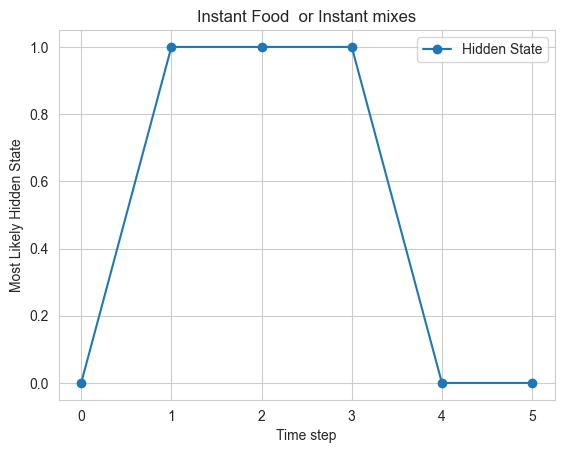

In [16]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Instant Food  or Instant mixes")
plt.legend()
plt.show()